# ASSIGNMENT 1

In [1]:
# Load packages
import numpy as np 
import pandas as pd 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

## Application to data
#### Using the Lab 1 Excel file, do the following exercises.

1) The first tab of the Excel file displays the number of Instagram followers of AIMS
students (y) and the number of people AIMS students follow (x) as provided by a
survey. Calculate:

- the correlation coefficient;
- the regression equation;
- the forecasted number of Instagram followers of an AIMS student who follows 200
people.

In [2]:
# import data
df = pd.read_excel("lab1.xlsx", "Ex1")
df

,How many people do you follow on Instagram?,How many followers do you have on Instagram ?
0,126,161
1,700,380
2,275,207
3,500,900
4,188,160
...,...,...
364,360,392
365,344,370
366,218,217
367,312,280


In [3]:
# define our variables
x = df["How many people do you follow on Instagram?"]
y = df["How many followers do you have on Instagram ?"]

# calculate our linear regression statistics
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(" ")
print(f"Correlation coefficient (r) = {r}")

 
Correlation coefficient (r) = 0.6411727509319441



The correlation coeffient shows a positive moderate linear relationship between the number of people you follow on instagram and the people that follow you on instagram. We now need to find the regression equation.

In general,

$Y_{i} = \beta_{0} + \beta_{1} X_{i} + \epsilon_{i}$ where $\beta_{0}$ is the intercept and $\beta_{1}$ is the slope.

In [4]:
# print slope, intercept and regression equation
print(" ")
print(f" Estimate intercept = {intercept}")
print(f" Estimate slope = {slope}")
print(" ")
print(f" Regression equation: ŷ = {intercept:.3f} + {slope:.3f}x")

 
 Estimate intercept = 60.35015375460631
 Estimate slope = 0.8936592061432093
 
 Regression equation: ŷ = 60.350 + 0.894x


AIMS students have approximately 60 followers when they don't follow anyone, and for every person they follow, their followers will increase by 0.894 units.

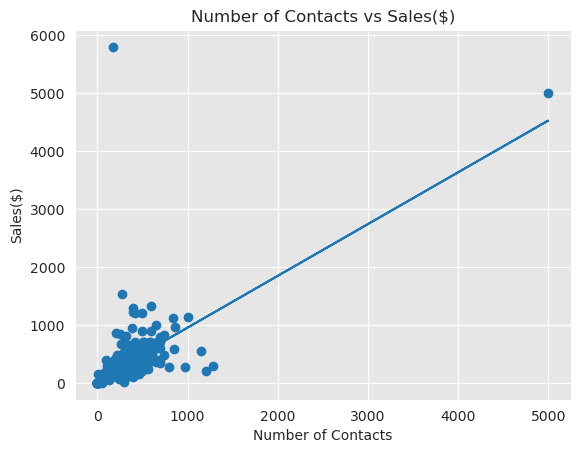

In [5]:
# define a function for our regression model
def RegEq(x):
  return slope * x + intercept

model = list(map(RegEq, x))

# visualise the model against given data
plt.scatter(x, y)
plt.plot(x, model)
plt.title("Number of Contacts vs Sales($)")
plt.xlabel("Number of Contacts")
plt.ylabel("Sales($)")
plt.show()

In [6]:
# predict number of followers for studens who follow 200 people
prediction = RegEq(200)
print(" ")
print(f"AIMS student who follows 200 people have about {prediction:.0f} followers")

 
AIMS student who follows 200 people have about 239 followers


2) Do exercise 3 from exercises pdf (data are on the second tab of the Excel file) with Python or R.

#### Exercise 3

(Source: Lind et al., 2011) Mr. James McWhinney, president of Daniel-James Financial Services, believes there is a relationship between the number of client contacts and the dollar amount of sales. To document this assertion, Mr McWhinney gathered the following sample information. The X column indicates the number of client contacts last month, and the Y column shows the value of sales ($ thousands) last month for each client sampled.

(a) Determine the regression equation.

(b) Determine the estimated sales if 40 contacts are made.

In [7]:
# import data
df1 = pd.read_excel("lab1.xlsx", "Ex2")
df1

,NbOfContacts,Sales
0,14,24
1,12,14
2,20,28
3,16,30
4,46,80
5,23,30
6,48,90
7,50,85
8,55,120
9,50,110


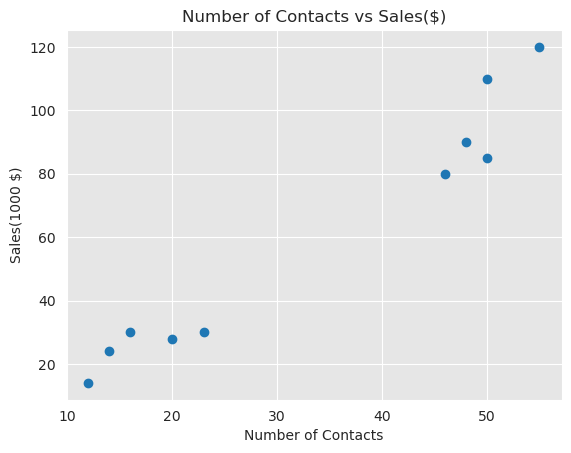

In [8]:
# define variables
x = df1["NbOfContacts"]
y = df1["Sales"]

# visualise the data
plt.scatter(x, y)
plt.title("Number of Contacts vs Sales($)")
plt.xlabel("Number of Contacts")
plt.ylabel("Sales(1000 $)")
plt.show()

In [9]:
# calculate the linear regression statistics 
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(" ")
print(f"Correlation coefficient (r) = {r}")

 
Correlation coefficient (r) = 0.9753621465256992



r = 0.975 implies a very strong positive linear relationship between the number of contacts and sales at Daniel-James Financial Services. We will therefore determine the regression equation.

In [10]:
# print the stats and regression model
print(" ")
print(f" Estimate intercept = {intercept}")
print(f" Estimate slope = {slope}")
print(" ")
print(f" Regression equation: ŷ = {intercept:.3f} + {slope:.3f}x")

 
 Estimate intercept = -12.201037521318945
 Estimate slope = 2.194641841955657
 
 Regression equation: ŷ = -12.201 + 2.195x


Sales are -12.201 when there are no contacts. For every single contact made, sales will increase by 2.195 units.

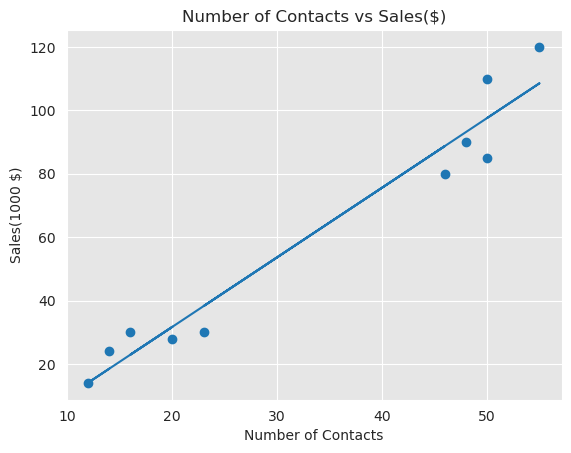

In [11]:
# define a function that plots our model
def RegEq(x):
  return slope * x + intercept

model = list(map(RegEq, x))

plt.scatter(x, y)
plt.plot(x, model)
plt.title("Number of Contacts vs Sales($)")
plt.xlabel("Number of Contacts")
plt.ylabel("Sales(1000 $)")
plt.show()

The regression equation seems to fit our data well so we can use it to predict Sales values.

In [12]:
# predict sales given 40 contacts were made
prediction = RegEq(40)
print(" ")
print(f"Estimated sales are ${prediction*1000:.3f} if 40 contacts are made.")

 
Estimated sales are $75584.636 if 40 contacts are made.
